# **CREDIT CARD**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CC GENERAL.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 =
frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>2  |  Libraries</div></b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>4  |  Cleaning and organizing the dataset</div></b>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Deleting the column 'CUST_ID'

df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div class="alert alert-block alert-info" style="background-color:#f9d9f1;color:#e141b9;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> As there are null data in the dataset, we will fill them with the average of each variable.</div>

In [ ]:
# Filling null values
df.fillna(df.mean(), inplace = True)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Identify number of columns by type

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 1
Continuous features Count 16
Categorical features Count 0
Binary Categorical features Count 0


In [ ]:
# Outliers

outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [ ]:
# Plot outliers

def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,40))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

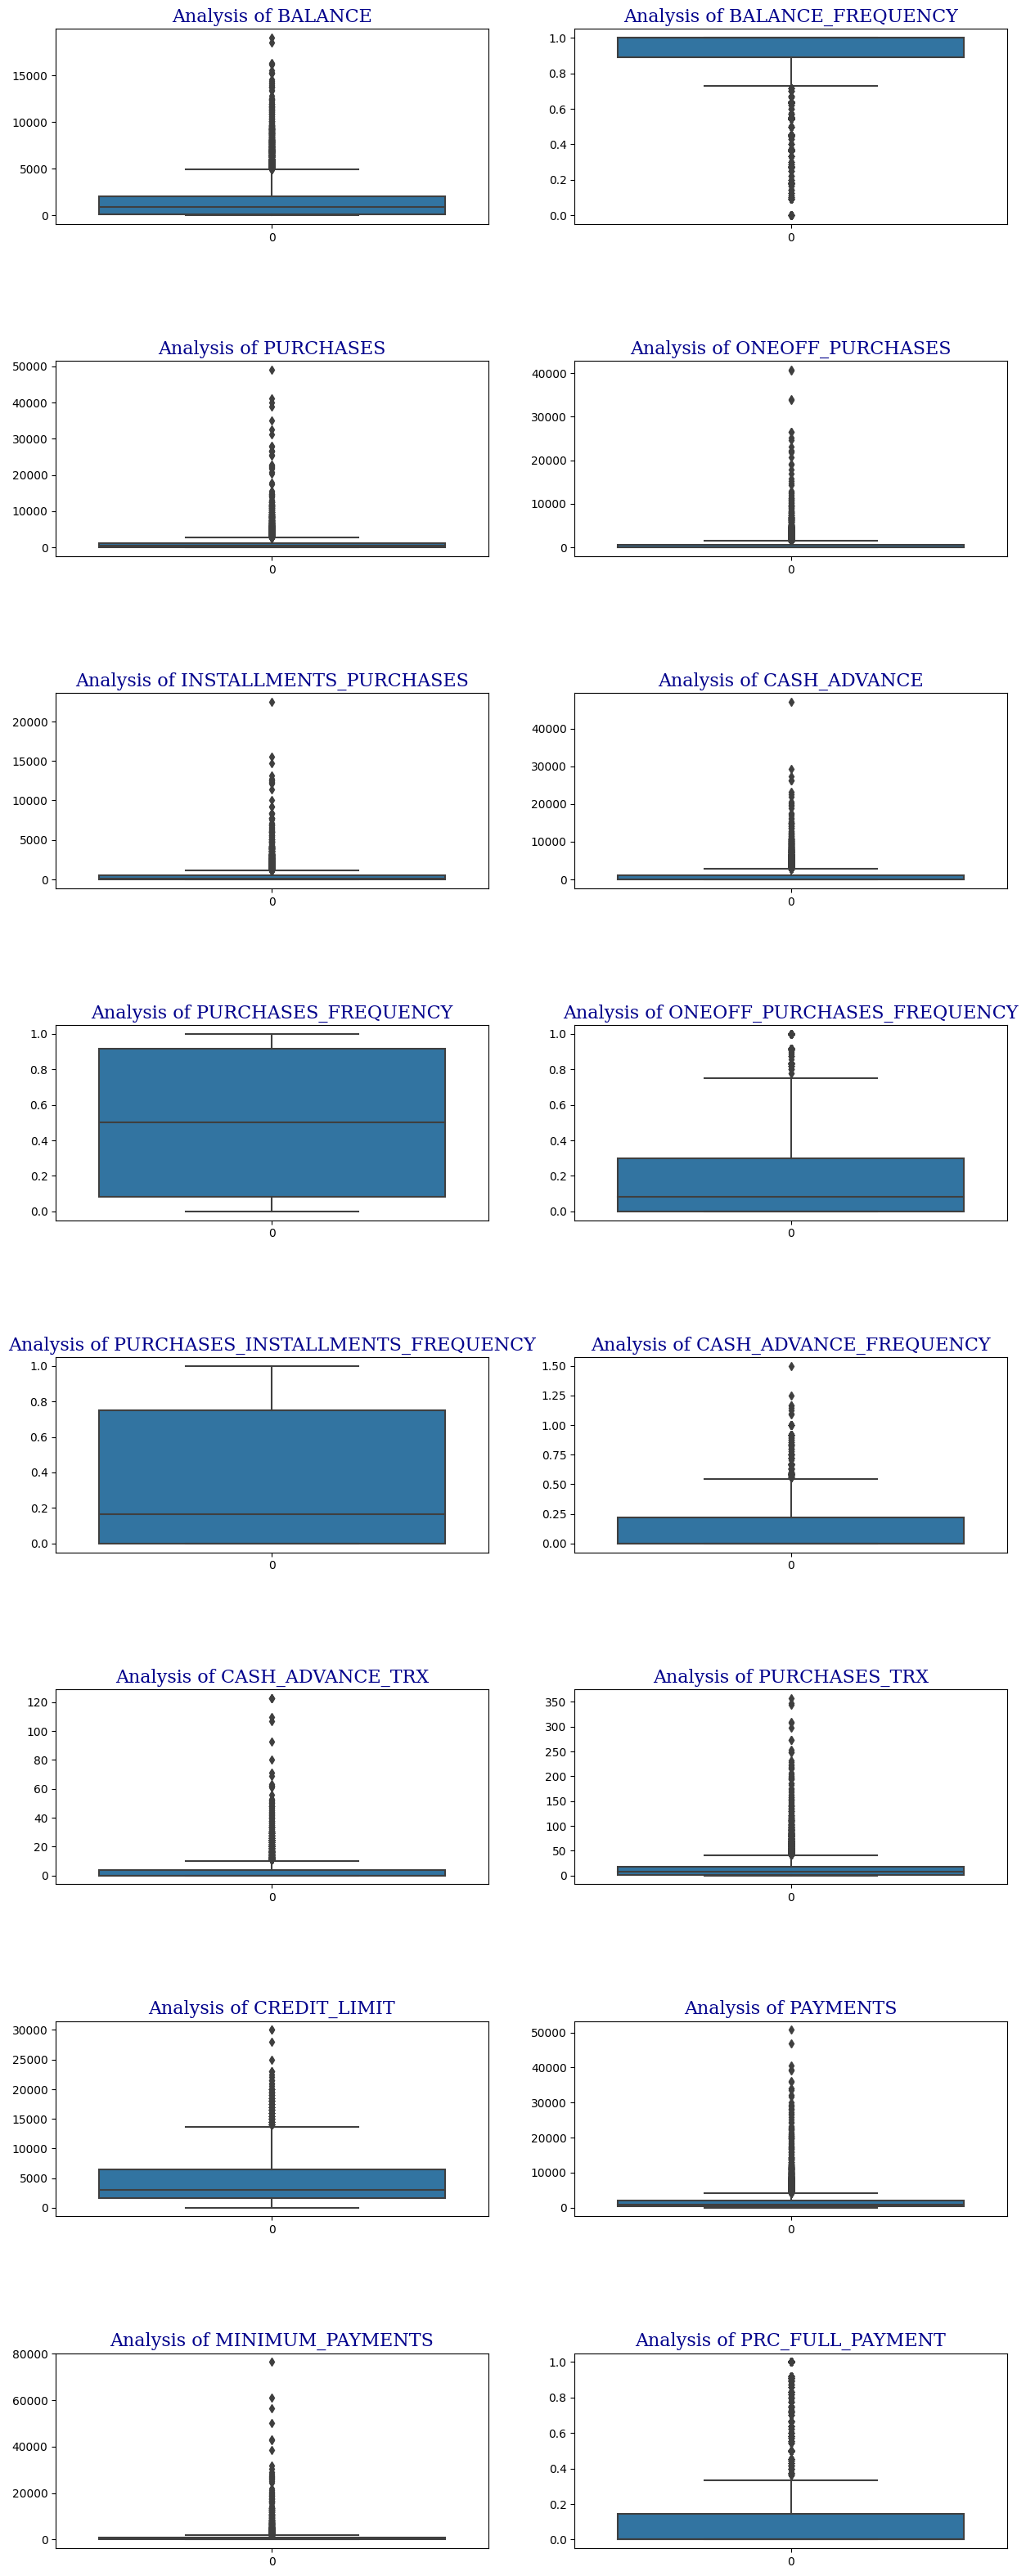

In [ ]:
plot_boxplot(df, continuous_features)

In [ ]:
# Remove outliers

def remove_outliers(df,outliers_features):
    # create copy of dataframe

    data = df.copy()

    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
#         data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [ ]:
df = remove_outliers(df,outliers_features)

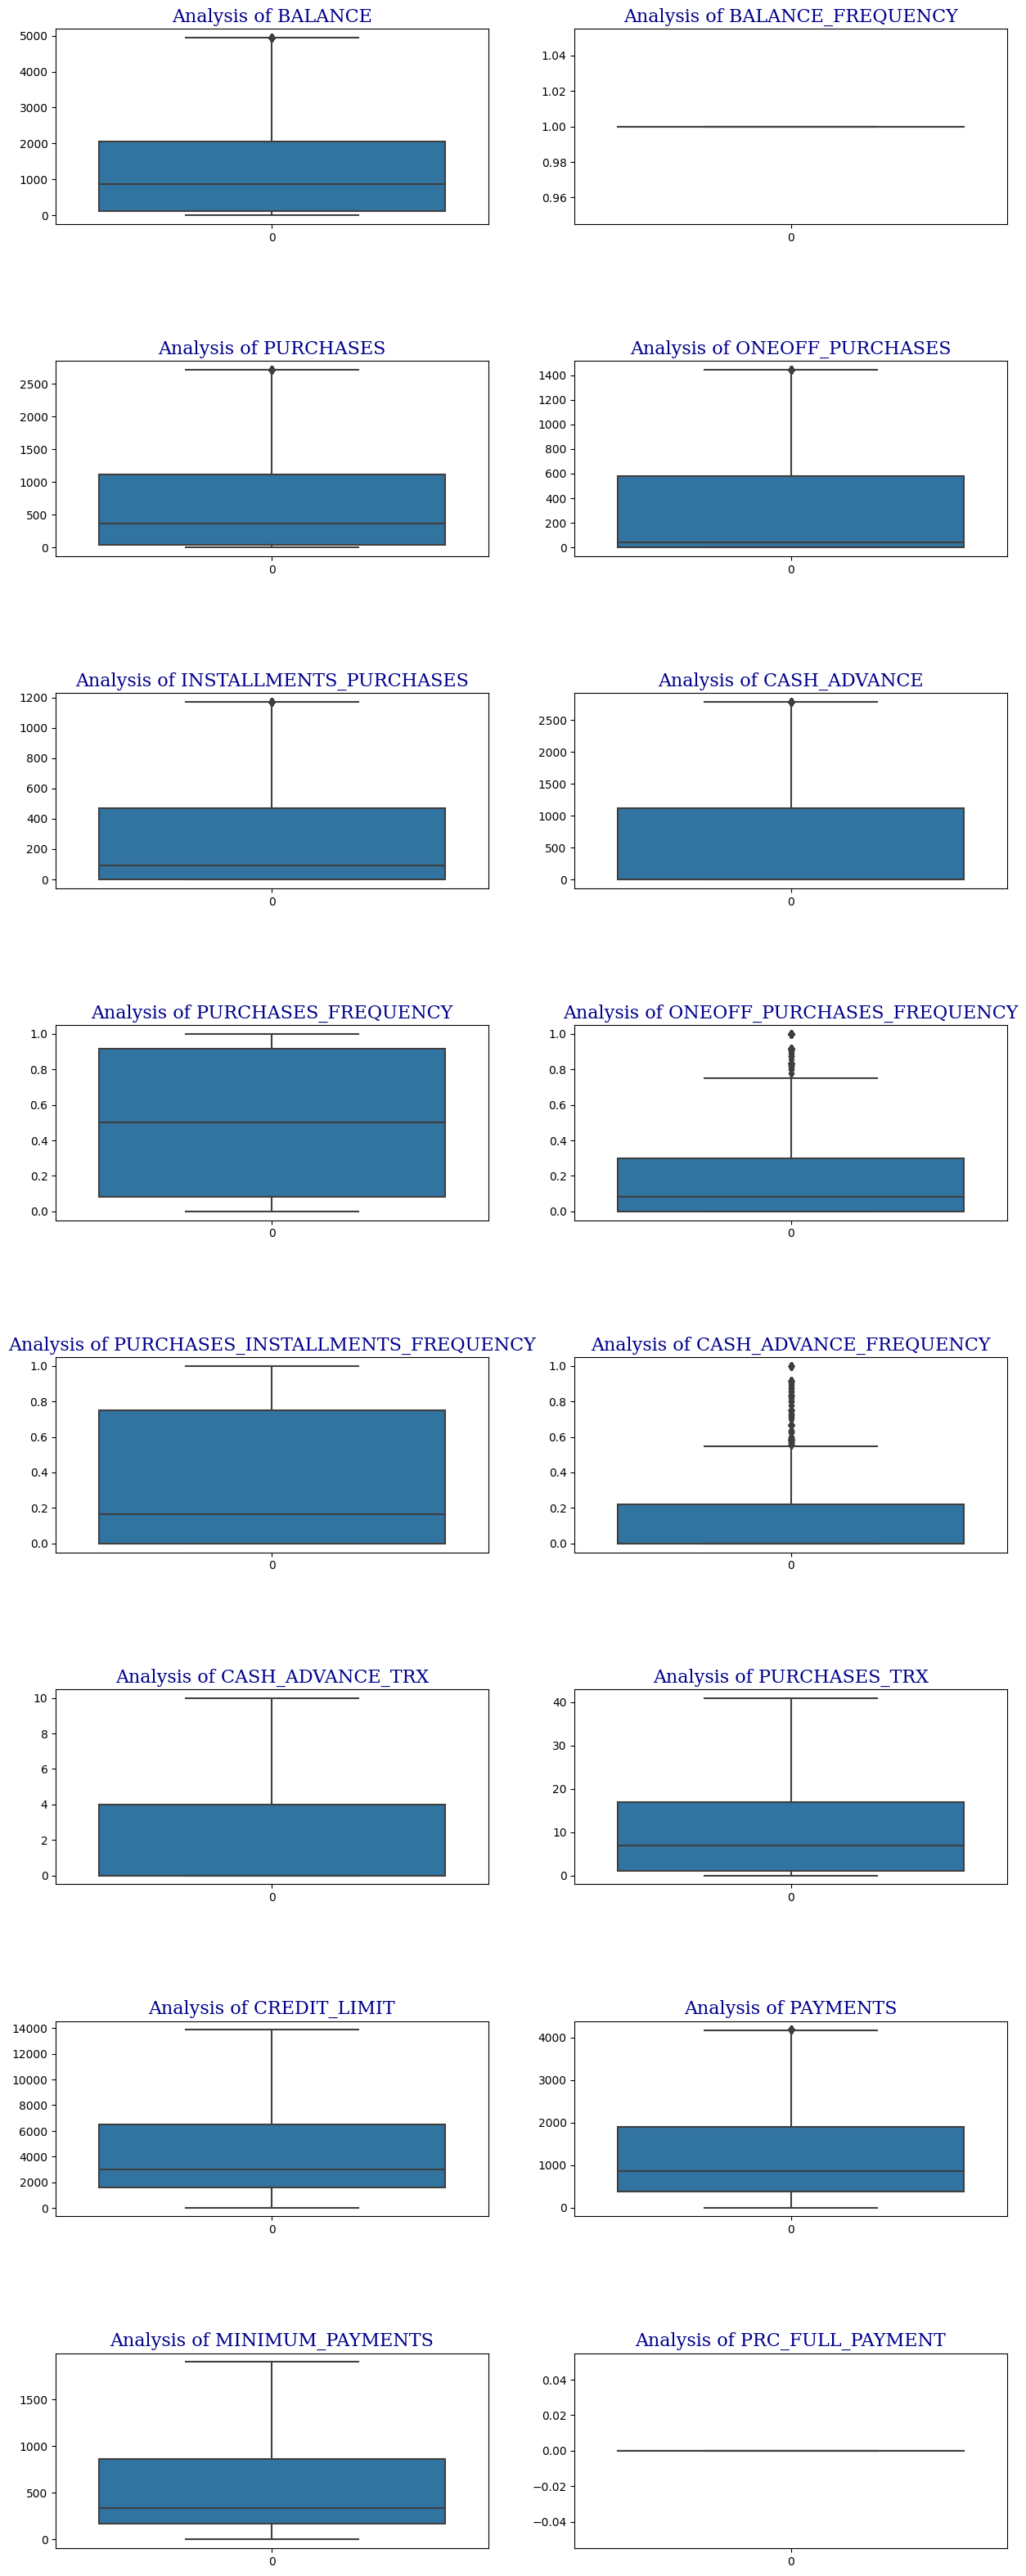

In [ ]:
plot_boxplot(df, continuous_features)

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0,8950.000000
mean,1390.514625,1.0,737.160840,354.413316,295.585568,672.520384,0.490351,0.202458,0.364437,0.134972,2.383128,11.623799,4419.304199,1347.091248,593.691703,0.0,11.517318
std,1537.551539,0.0,879.560687,511.940728,396.268585,998.623835,0.401371,0.298336,0.397448,0.199257,3.417878,13.041645,3383.755481,1272.822027,571.994789,0.0,1.338331
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.0,6.000000
25%,128.281915,1.0,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.0,12.000000
50%,873.385231,1.0,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.0,12.000000
75%,2054.140036,1.0,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.0,12.000000
max,4943.000000,1.0,2716.000000,1444.000000,1172.000000,2785.000000,1.000000,1.000000,1.000000,1.000000,10.000000,41.000000,13850.000000,4178.000000,1904.000000,0.0,12.000000


<div class="alert alert-block alert-info" style="background-color:#f9d9f1;color:#e141b9;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> There are columns with only 1 value. Let's exclude them.</div>

In [ ]:
# Deleting the columns

df.drop( columns = ['BALANCE_FREQUENCY'],inplace=True)
df.drop( columns = ['PRC_FULL_PAYMENT'],inplace=True)

In [ ]:
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.00,0.0,2785.000000,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,12
3,1666.670542,1499.00,1444.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,12
4,817.714335,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,12


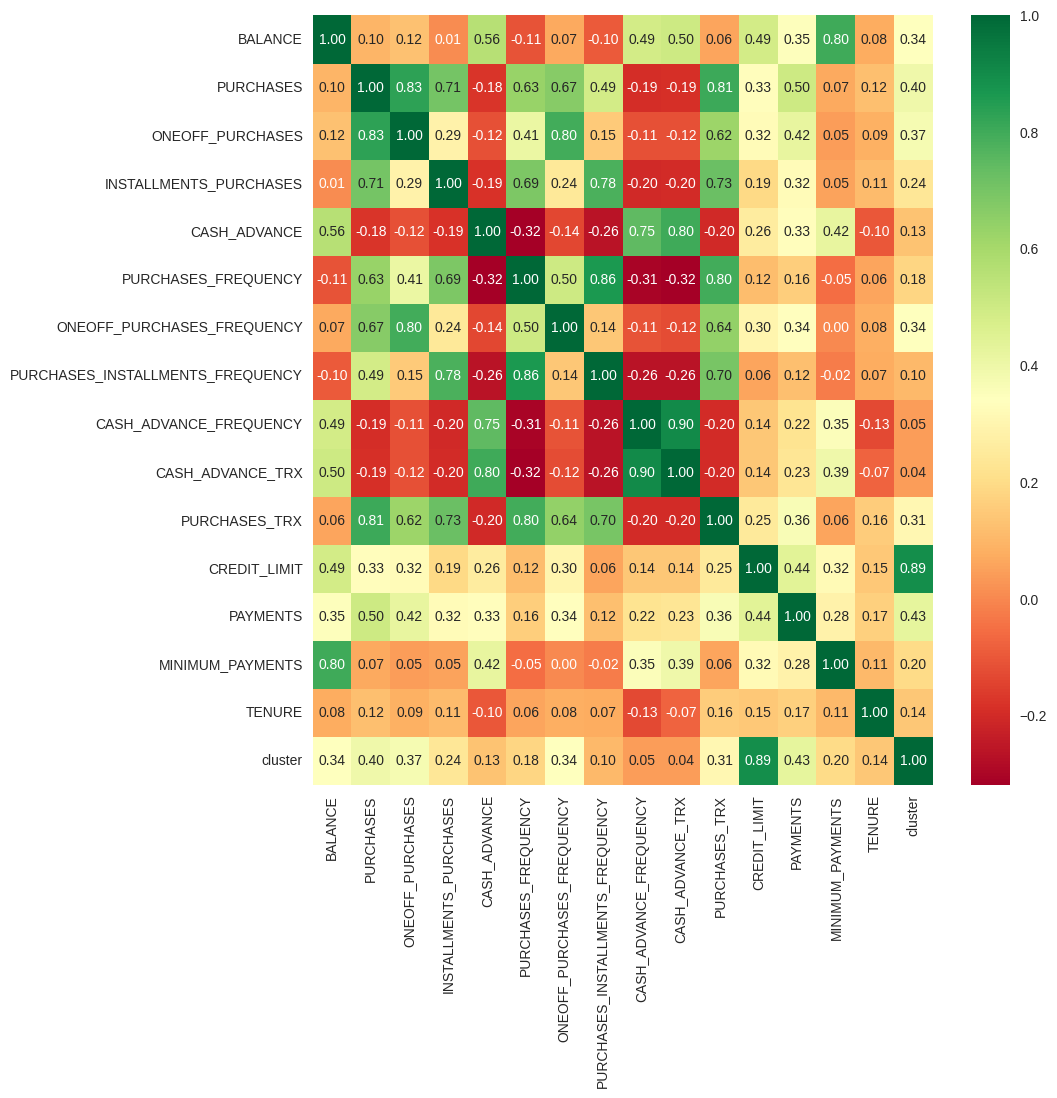

In [ ]:
# Heatmap

df_corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>5  |  Clusters - KMeans</div></b>

In [ ]:
# Libraries for clustering and evaluation

! pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


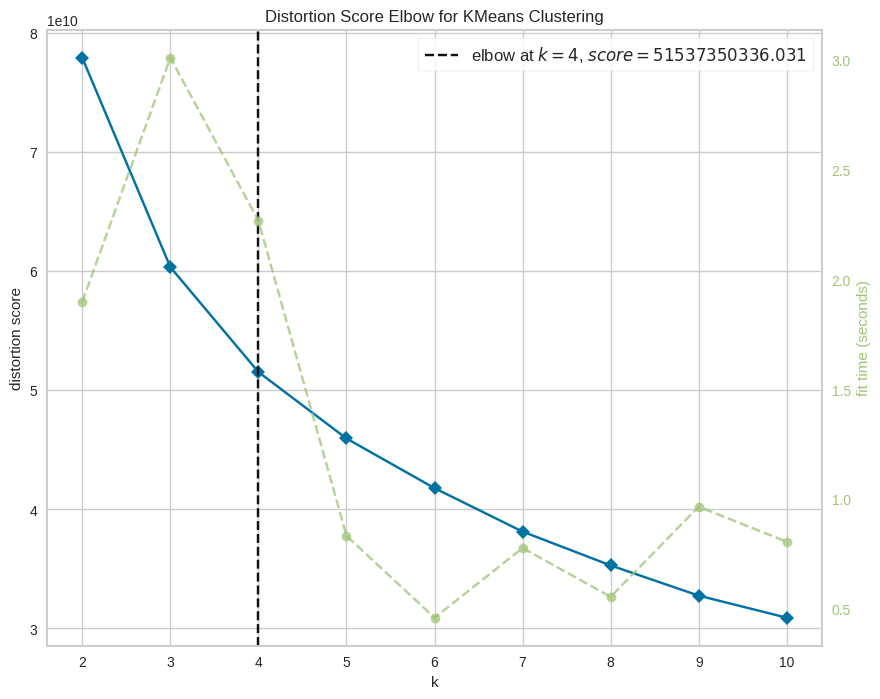

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# KElbowVisualizar

plt.figure(figsize=(10, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(df)
elbow_graph.show()

<div class="alert alert-block alert-info" style="background-color:#f9d9f1;color:#e141b9;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Let's use 4 Clusters, as indicated by KElbow.</div>

In [ ]:
# 4 clusters

grouper = KMeans(n_clusters = 4)

In [ ]:
# Group into 4 groups and create a variable with the labels.

grouper.fit(df)
labels = grouper.labels_
print(labels)

[0 1 3 ... 0 0 0]


In [ ]:
# Creating a chart (go = graphic object) with data from labels in two dimensions ('CREDIT_LIMIT' and 'BALANCE')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['CREDIT_LIMIT'], y = df['BALANCE'],
                                                        mode = 'markers',
                                                        marker = dict(color = grouper.labels_.astype(np.float)),
                                                        text = labels))
fig.update_layout(title = 'BALANCE X CREDIT_LIMIT')
fig.update_xaxes(title = 'CREDIT_LIMIT')
fig.update_yaxes(title = 'BALANCE')
fig.show()

In [ ]:
# Creating a 3D chart

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['CREDIT_LIMIT'],
                         y = df['MINIMUM_PAYMENTS'], z = df['BALANCE'],
                         mode = 'markers',
                          marker = dict(color = grouper.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>6  |  Silhouette Coefficient - KMeans</div></b>

In [ ]:
# Library
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Create a range
range_n_clusters = [i for i in range(2,10)]
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Importing KMeans and applying silhouette

from sklearn.cluster import KMeans
values_silhouette = []
for k in range_n_clusters:
    grouper = KMeans(n_clusters=k)
    labels = grouper.fit_predict(df)
    mean_silhouette = silhouette_score(df, labels)
    values_silhouette.append(mean_silhouette)

In [ ]:
grouper_kmeans = KMeans(n_clusters = 4)
labels_kmeans = grouper_kmeans.fit_predict(df)
print("Labels K-means: ", labels_kmeans)

Labels K-means:  [0 1 2 ... 0 0 0]


In [ ]:
# Silhouette Coefficient K-mean

print("The Silhouette Coefficient K-mean is:", silhouette_score(df, labels_kmeans))

The Silhouette Coefficient K-mean is: 0.3925125463765879


<div class="alert alert-block alert-info" style="background-color:#f9d9f1;color:#e141b9;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> The silhouette coefficient varies from -1 to 1. If it is positive, we consider it good, and the closer to 1, the better.</div>

## <b><div style='padding:15px;background-color:#e141b9;color:white;border-radius:2px;font-size:110%;text-align: center'>7  |  Cluster Attributes
</div></b>

In [ ]:
# Statistical summary of data by cluster

import seaborn as sns
df["cluster"] = labels_kmeans
df.groupby("cluster").describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        5149.0   774.649905   772.355457    0.000000    71.431411   
1        1200.0  3764.032103  1084.111682  779.577168  2934.888136   
2        1683.0   674.126114   760.701291    0.000000    84.233857   
3         918.0  3055.599958  1975.973747    0.488050   795.921563   

                                               PURCHASES               ...  \
                 50%          75%          max     count         mean  ...   
cluster                                                                ...   
0         556.912886  1253.764799  3572.844689    5149.0   479.596953  ...   
1        3897.002429  4943.000000  4943.000000    1200.0   654.791808  ...   
2         335.954820  1089.734675  3145.204423    1683.0  1243.591176  ...   
3        3686.761661  4943.000000  4943.000000     918.0  1361.035610  ...   

        MINIMUM_PAYMENTS          TENURE                                  \
                     75%     max   count       mean       std  min   25%   
cluster                                                                    
0             590.889201  1904.0  5149.0  11.355215  1.535219  6.0  12.0   
1            1851.531211  1904.0  1200.0  11.581667  1.229332  6.0  12.0   
2             365.152485  1904.0  1683.0  11.834225  0.729353  6.0  12.0   
3            1904.000000  1904.0   918.0  11.761438  0.948370  6.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  
3        12.0  12.0  12.0  

[4 rows x 120 columns]

In [ ]:
# Statistical analysis of the 'BALANCE' attribute

df.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,5149.0,774.649905,772.355457,0.000000,71.431411,556.912886,1253.764799,3572.844689
1,1200.0,3764.032103,1084.111682,779.577168,2934.888136,3897.002429,4943.000000,4943.000000
2,1683.0,674.126114,760.701291,0.000000,84.233857,335.954820,1089.734675,3145.204423
3,918.0,3055.599958,1975.973747,0.488050,795.921563,3686.761661,4943.000000,4943.000000


In [ ]:
# Analysis of the selected attributes using only the average.
# Also including the n_clients column.

description = df.groupby("cluster")["BALANCE", "PURCHASES", "ONEOFF_PURCHASES",
                                    "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
                                    "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY",
                                    "PURCHASES_INSTALLMENTS_FREQUENCY",
                                    "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX",
                                    "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS",
                                    "MINIMUM_PAYMENTS", "TENURE"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
cluster                                                                       
0         774.649905   479.596953        212.525758              228.818254   
1        3764.032103   654.791808        326.721042              240.856833   
2         674.126114  1243.591176        614.414219              448.944278   
3        3055.599958  1361.035610        709.781776              460.462113   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                                  
0          448.822626             0.446816                    0.127253   
1         1928.557537             0.362701                    0.169953   
2          200.128363             0.655852                    0.357076   
3         1151.399412             0.597976                    0.383301   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster    

In [ ]:
# Analysis 'PURCHASES' and 'PAYMENTS' attributes using the average.
# Also including the n_clients column.

description = df.groupby("cluster")["PURCHASES", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

           PURCHASES     PAYMENTS  n_clients
cluster                                     
0         479.596953   868.053079       5149
1         654.791808  2080.911456       1200
2        1243.591176  1608.740928       1683
3        1361.035610  2595.050802        918


### **CONCLUSION:**



**Analyzing only 2 attributes, we can verify the following:**

  1--The cluster with the highest number of customers has the lowest Payments and Purchases.

  2--The cluster with the lowest number of customers has the highest Payments and Purchases.

  3--Many other analyzes can be done using all the attributes.

  4--After analyzing the attributes, we can make a marketing plan directed to each cluster.